# Predicción del número de vehículos registrados en el sistema de tránsito nacional

Integrantes:

- Miguel Angel Bula Carmona
- Dioselin Esteban Brito Peñaloza
- Marcos David Carrillo Builes
- Yeferson Steven Aguilar Alvarado

# Introducción

El presente trabajo se centra en la predicción del número de vehículos registrados diariamente en el Registro Único Nacional de Tránsito (RUNT), abordando un desafío crucial en la gestión del tránsito y transporte a nivel nacional. La necesidad de anticipar y comprender las tendencias en el registro de vehículos es esencial para una planificación efectiva y una toma de decisiones informada en el ámbito gubernamental.

# Objetivo

El objetivo de este trabajo es construir un modelo predictivo para predecir el número diario de vehículos registrados en el Registro Único Nacional de Tránsito (RUNT). Para lograr esto, hemos seguido un enfoque sistemático que implica la definición de variables explicativas, la elección de un modelo adecuado y la evaluación de su rendimiento.

# Variables Explicativas


Las variables explicativas seleccionadas son el año, mes y día. Estas variables temporales fueron elegidas considerando la posible variación estacional en el número de registros de vehículos. La información de la fecha de registro puede proporcionar patrones estacionales que ayudarán al modelo a capturar mejor las tendencias a lo largo del tiempo.

# Desarrollo 

Preparación de los datos

In [1]:
#Importacion de las librerias necesarias
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

Cargamos un conjunto de datos de registros de autos desde un archivo Excel, realiza algunas operaciones para limpiar y formatear los datos, y finalmente mostramos el DataFrame resultante.

In [2]:
#Recoleccion y limpieza da los datos
df=pd.read_excel("C:\\Users\\yefer\\Downloads\\Analitica\\Trabajo 4\\registros_autos_entrenamiento.xlsx")
df = df.set_index('Fecha')
df.index = pd.to_datetime(df.index)

df=df.dropna()


#Damos un mirada a los datos
df

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\yefer\\Downloads\\Analitica\\Trabajo 4\\registros_autos_entrenamiento.xlsx'

Miramos con que variables estamos trabajando

In [ ]:
#miramos con que variables estamos trabajando
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2012-01-01 to 2017-12-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Unidades  2192 non-null   int64
dtypes: int64(1)
memory usage: 34.2 KB


Visualizamos gráficamente el número de vehículos registrados diariamente, para esto se utiliza un gráfico de dispersión.

Figura 1. gráficamente el número de vehículos registrados diariamente

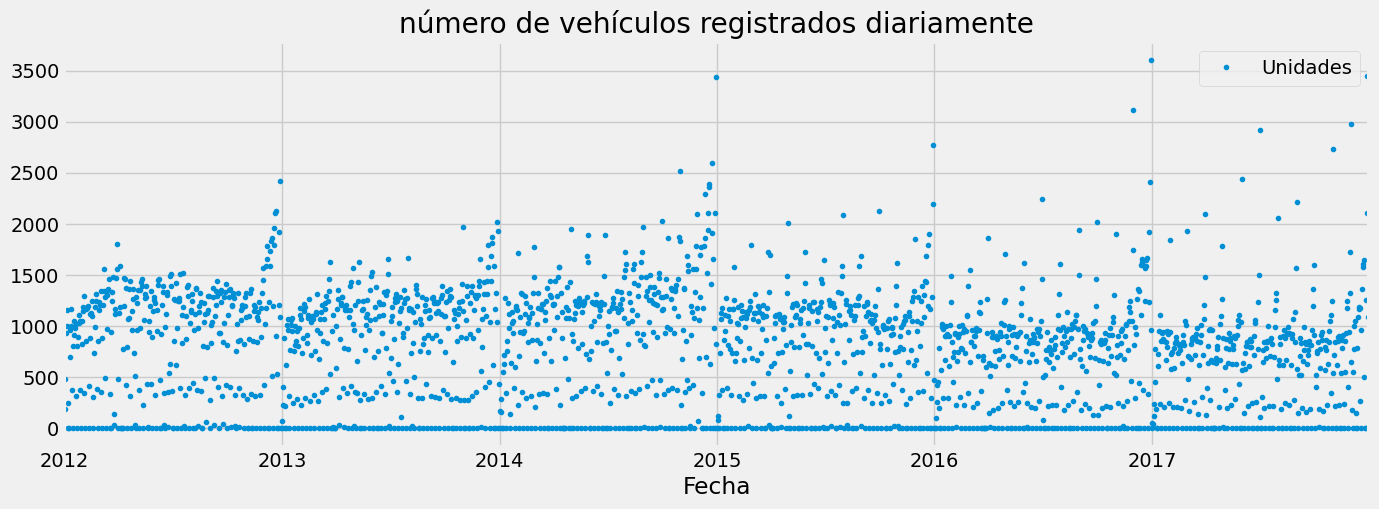

In [ ]:
#Visualizamos los datos graficamente
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='número de vehículos registrados diariamente')
plt.show()

Division de datos de Entrenamiento y Prueba

Se prepara datos temporales para el entrenamiento del modelo, dividiendo el conjunto de datos en un 80% para entrenamiento y un 20% para prueba y visualizamos esta división en un gráfico.

Figura 2. Gráfica division de datos de Entrenamiento y Prueba

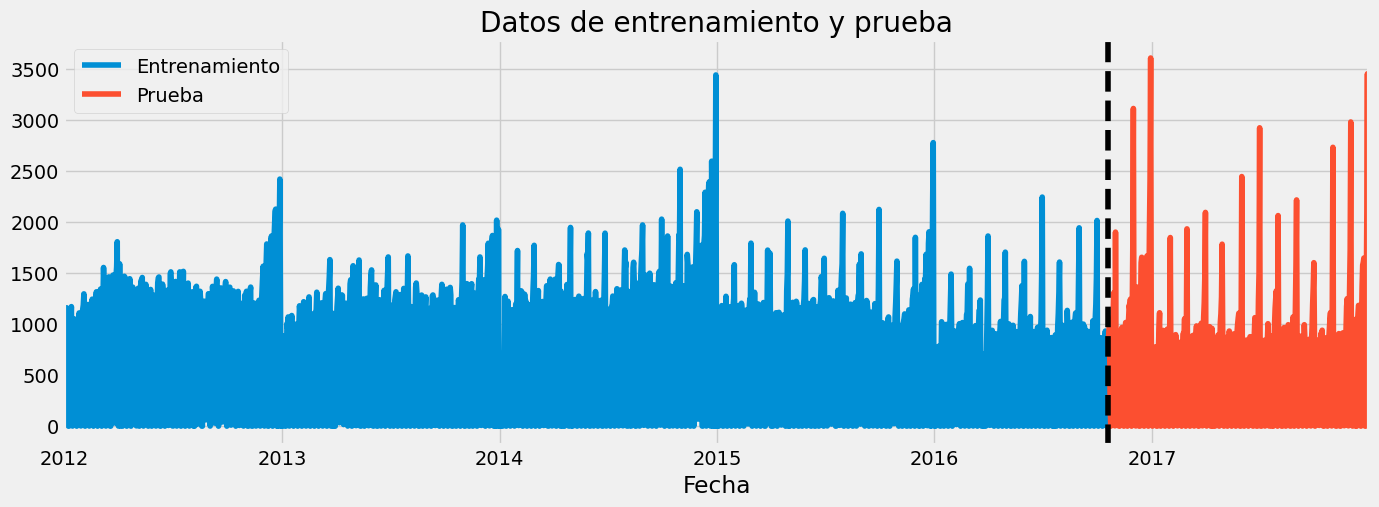

In [ ]:
#Para el entrenamiento se tomaran el 80% de los Datos totales

Factor_Entrenamiento=0.8
Fecha_de_corte=df.index[int((len(df)-1)*Factor_Entrenamiento)]

train=df[df.index<=Fecha_de_corte]
test=df[df.index>Fecha_de_corte]


fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Entrenamiento', title='Datos de entrenamiento y prueba')
test.plot(ax=ax, label='Prueba')
ax.axvline(Fecha_de_corte, color='black', ls='--')
ax.legend(['Entrenamiento', 'Prueba'])
plt.show()


Se selecciona y visualizamos los datos de una semana específica y proporcionamos una representación gráfica del comportamiento de los datos durante ese período.

Se observa el comportamiento de los datos en una semana, desde el lunes 12 hasta el lunes 20 de octubre del 2015

Figura 3. Gráfica comportamiento de los datos en una semana

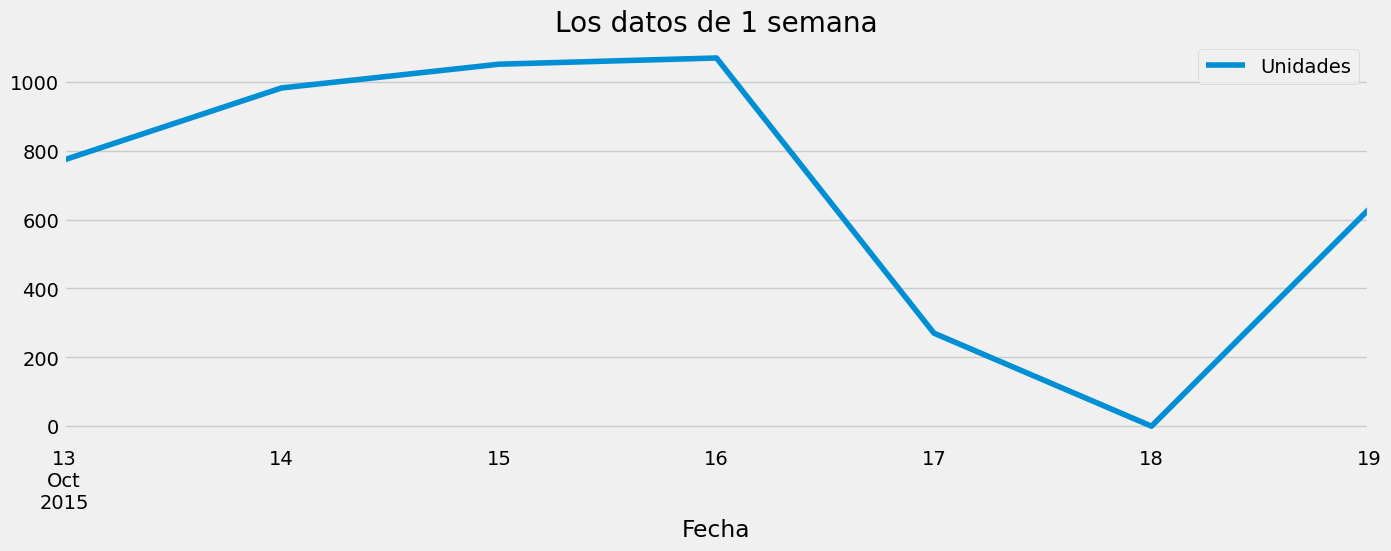

In [ ]:
#Observemos el comportamiento de los datos en una semana, desde el lunes 12 hasta el lunes 20 de octubre del 2015
df.loc[(df.index > '2015-10-12') & (df.index < '2015-10-20')] \
    .plot(figsize=(15, 5), title='Los datos de 1 semana')
plt.show()

Se selecciona y se visualizan los datos de una semana específica y proporcionamos una representación gráfica del comportamiento de los datos durante ese período.

Se observemos el comportamiento de los datos en el mes de enero a febrero del año 2015

Figura 4. Gráfica comportamiento de los datos en el mes de enero a febrero del año 2015

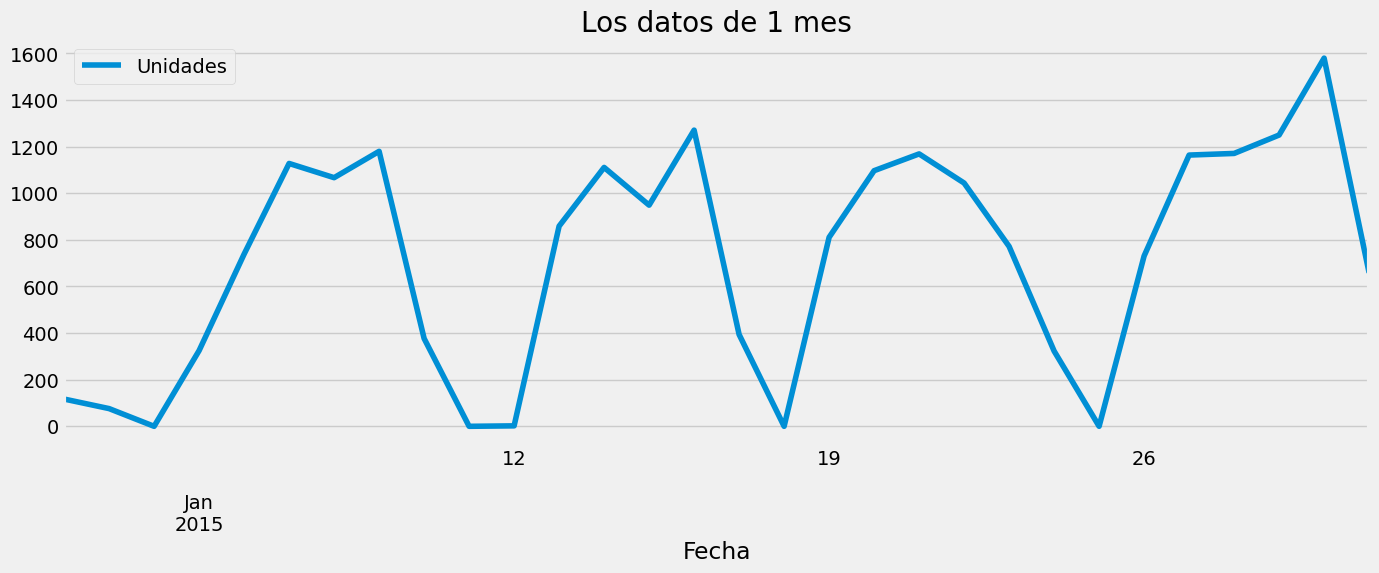

In [ ]:
#Observemos el comportamiento de los datos en el mes de enero a febrero del año 2015
df.loc[(df.index > '2015-01-01') & (df.index < '2015-02-01')] \
    .plot(figsize=(15, 5), title='Los datos de 1 mes')
plt.show()

Caracteristicas consideradas

Creamos la función crear_caracteristicas y agregamos diversas características temporales, lo que es útil tanto para realizar análisis temporales más detallados o también para preparar datos para modelos de aprendizaje automático.

In [ ]:
def crear_caracteristicas(df):

    df = df.copy()
    df['dia_de_semana'] = df.index.dayofweek
    df['Trimestre'] = df.index.quarter
    df['mes'] = df.index.month
    df['año'] = df.index.year
    df['dia_del_año'] = df.index.dayofyear
    df['dia_del_mes'] = df.index.day
    df['semana_del_año'] = df.index.isocalendar().week
    return df

df = crear_caracteristicas(df)

In [ ]:
#visualicemos el nuevo dataframe creado
df

,Unidades,dia_de_semana,Trimestre,mes,año,dia_del_año,dia_del_mes,semana_del_año
Fecha,,,,,,,,
2012-01-01,0,6,1,1,2012,1,1,52
2012-01-02,188,0,1,1,2012,2,2,1
2012-01-03,482,1,1,1,2012,3,3,1
2012-01-04,927,2,1,1,2012,4,4,1
2012-01-05,1159,3,1,1,2012,5,5,1
...,...,...,...,...,...,...,...,...
2017-12-27,2102,2,4,12,2017,361,27,52
2017-12-28,3449,3,4,12,2017,362,28,52
2017-12-29,1084,4,4,12,2017,363,29,52


Tabla 1, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Visualicemos las caracteristicas / Realacion con la variable objetivo

Se crea un gráfico de caja que proporciona información sobre la distribución de las unidades en diferentes días de la semana.

Figura 5. Gráfica de caja distribución de las unidades en diferentes días de la semana.

C:\Users\yefer\AppData\Local\Temp\ipykernel_12432\4224326356.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dia_de_semana', y='Unidades', palette='Blues')


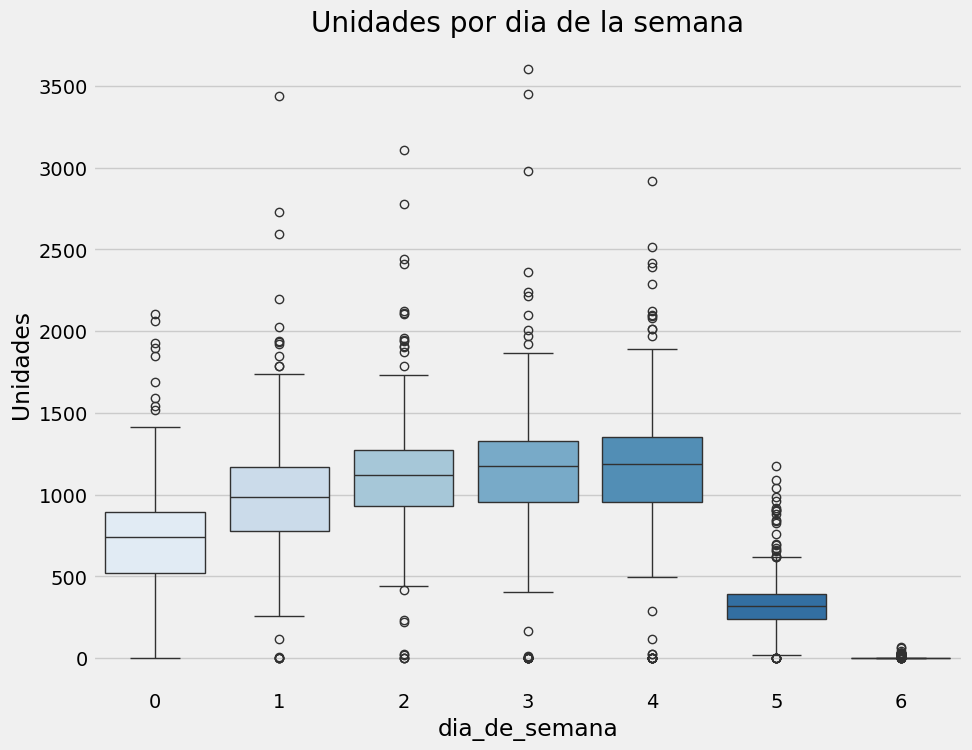

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dia_de_semana', y='Unidades', palette='Blues')
ax.set_title('Unidades por dia de la semana')
plt.show()

Se crea un gráfico de cómo se distribuyen las unidades en diferentes trimestres.

Figura 6. Gráfica de caja distribución de las unidades en diferentes trimestres.

C:\Users\yefer\AppData\Local\Temp\ipykernel_12432\1579002159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Trimestre', y='Unidades', palette='Reds')


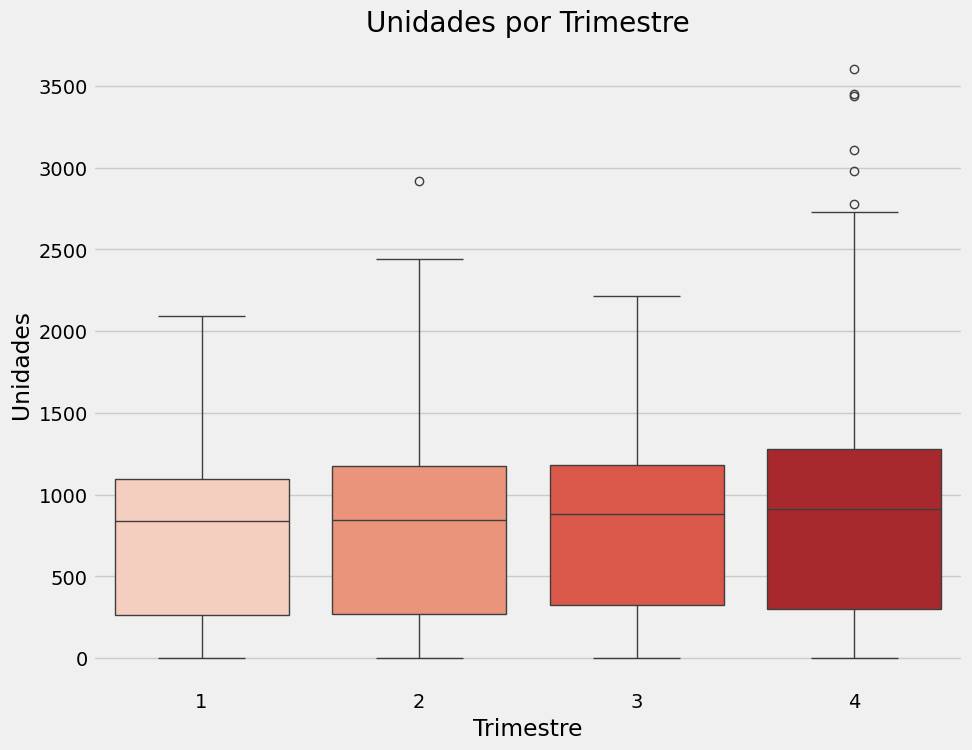

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='Trimestre', y='Unidades', palette='Reds')
ax.set_title('Unidades por Trimestre')
plt.show()

Se crea un gráfico para visualizar como se distribuyen las unidades a lo largo de diferentes meses.

Figura 7. Gráfica distribución de las unidades a lo largo de diferentes meses.

C:\Users\yefer\AppData\Local\Temp\ipykernel_12432\1243425992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mes', y='Unidades', palette='Greens')


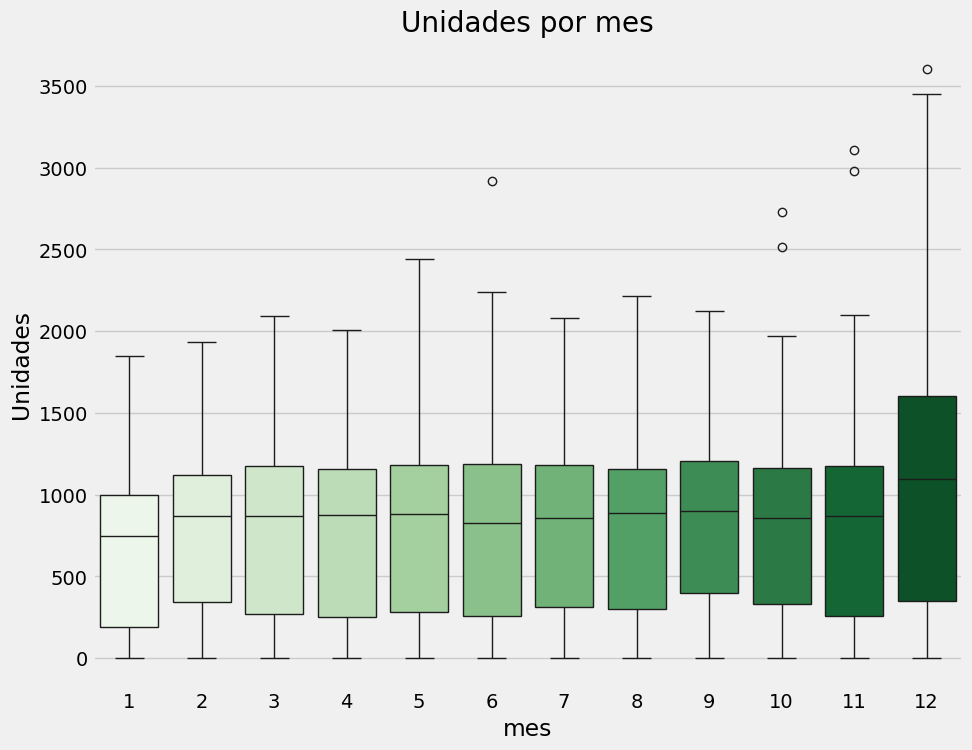

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='mes', y='Unidades', palette='Greens')
ax.set_title('Unidades por mes')
plt.show()

Se crea un gráfico para visualizar como se distribuyen las unidades a lo largo de diferentes años.

Figura 8. Gráfica distribución de las unidades a lo largo de diferentes años.

C:\Users\yefer\AppData\Local\Temp\ipykernel_12432\1256040440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='año', y='Unidades', palette='Purples')


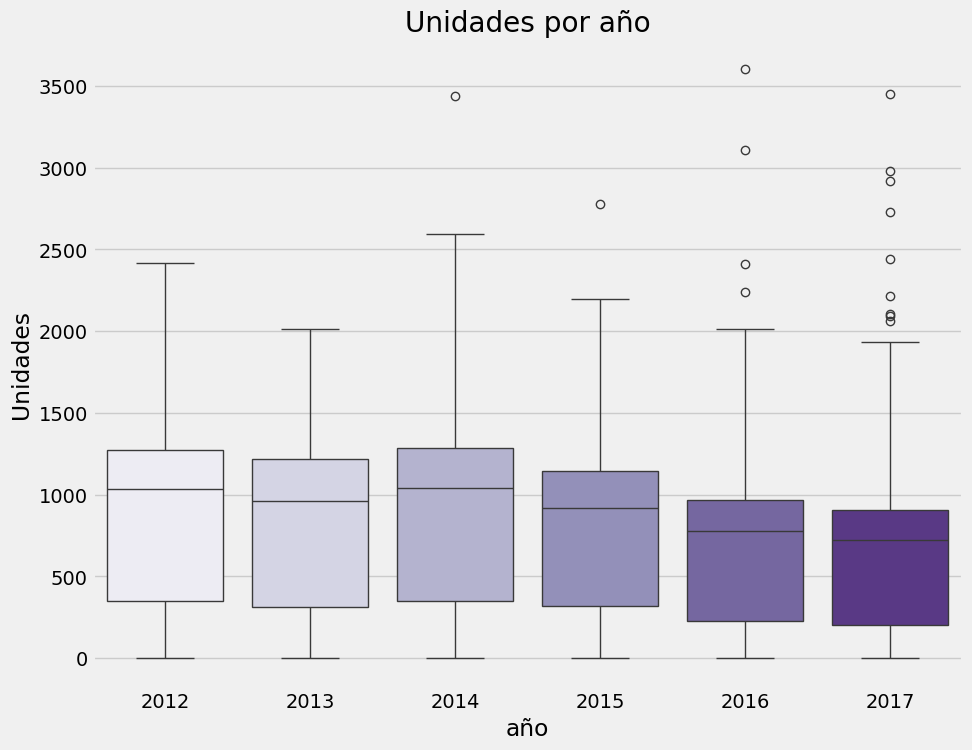

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='año', y='Unidades', palette='Purples')
ax.set_title('Unidades por año')
plt.show()

Se crea un gráfico para visualizar como se distribuyen las unidades en diferentes días del mes.

Figura 9. Gráfica distribución de las unidades en diferentes días del mes.

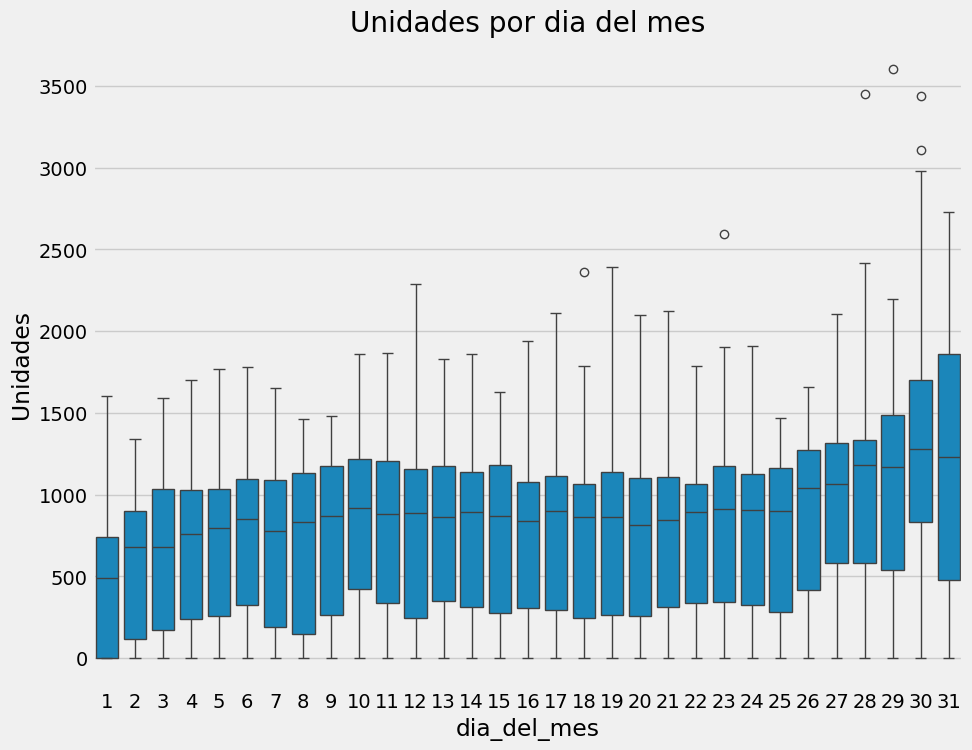

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dia_del_mes', y='Unidades')
ax.set_title('Unidades por dia del mes')
plt.show()

Las caracteristicas semana del año y dia del año no nos permite sacar ninguna conclusion util con el boxplot devido a su axtension

# Creacion del Modelo

Preparamos los datos para ser utilizados en un modelo de aprendizaje automático.

In [ ]:
train = crear_caracteristicas(train)
test = crear_caracteristicas(test)

CARACTERISTICAS = ['dia_de_semana', 'mes', 'año', 'dia_del_mes','semana_del_año','dia_del_año', 'Trimestre']
OBJETIVO = 'Unidades'

X_train = train[CARACTERISTICAS]
y_train = train[OBJETIVO]

X_test = test[CARACTERISTICAS]
y_test = test[OBJETIVO]

Utilizamos XGBoost para entrenar un modelo de regresión con las especificaciones y parámetros definidos. El rendimiento del modelo se evalúa en conjuntos de entrenamiento y prueba durante el proceso de entrenamiento.

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:961.15609	validation_1-rmse:892.15110
[100]	validation_0-rmse:447.91430	validation_1-rmse:444.43742
[200]	validation_0-rmse:302.88430	validation_1-rmse:350.10867


C:\Users\yefer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [19:24:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:261.60644	validation_1-rmse:321.04700
[400]	validation_0-rmse:243.47395	validation_1-rmse:305.60983
[500]	validation_0-rmse:231.84628	validation_1-rmse:296.26097
[600]	validation_0-rmse:223.22041	validation_1-rmse:290.33548
[700]	validation_0-rmse:216.62893	validation_1-rmse:286.37901
[800]	validation_0-rmse:211.00009	validation_1-rmse:284.69183
[900]	validation_0-rmse:206.51368	validation_1-rmse:284.23678
[963]	validation_0-rmse:203.87263	validation_1-rmse:284.10280


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

# Importancia de las caracteristicas

Visualizamos las características en el modelo de regresión entrenado con XGBoost, proporcionando información sobre qué características son más relevantes para las predicciones del modelo. La gráfica de barras horizontales muestra la importancia relativa de cada característica.

Figura 10. Gráfica de barras características en el modelo de regresión

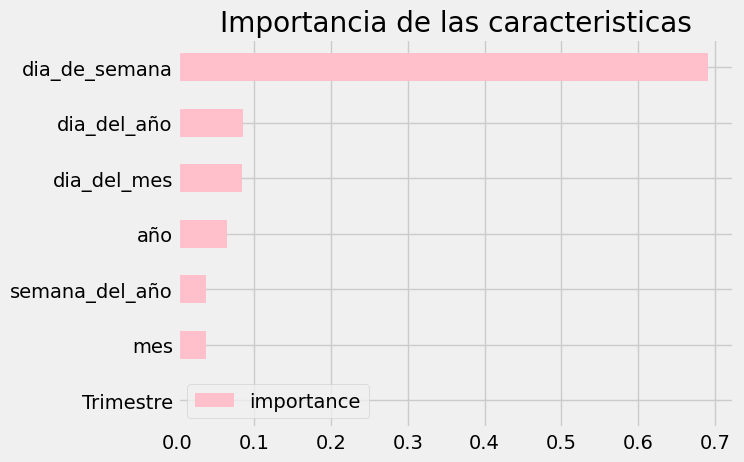

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Importancia de las caracteristicas',color='pink')
plt.show()

# Forecast en la prueba

Se hace una visualización comparativa entre los datos reales y las predicciones del modelo en el conjunto de prueba. La línea azul representa los datos reales, y los puntos representan las predicciones del modelo.

Figura 11. Gráfica comparativa entre los datos reales y las predicciones del modelo

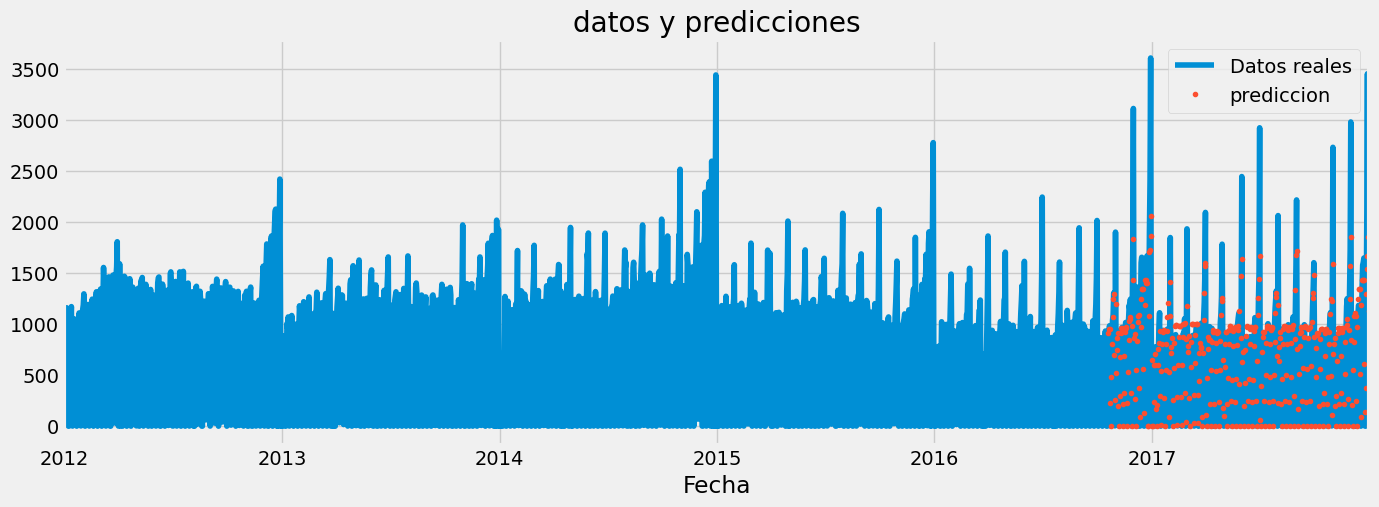

In [ ]:
test['prediction'] = reg.predict(X_test)
test['prediction']=test['prediction'].apply(lambda x: max(0, x))

ax = df[['Unidades']].plot(figsize=(15, 5))
test['prediction'].plot(ax=ax, style='.')
plt.legend(['Datos reales', 'prediccion'])
ax.set_title('datos y predicciones')
plt.show()


Se hace una vista más detallada de los datos reales y las predicciones del modelo para las fechas posteriores a la fecha de corte, lo que ayuda a evaluar la precisión del modelo en un período específico.

Figura 12. Gráfica vista más detallada de los datos reales y las predicciones del modelo

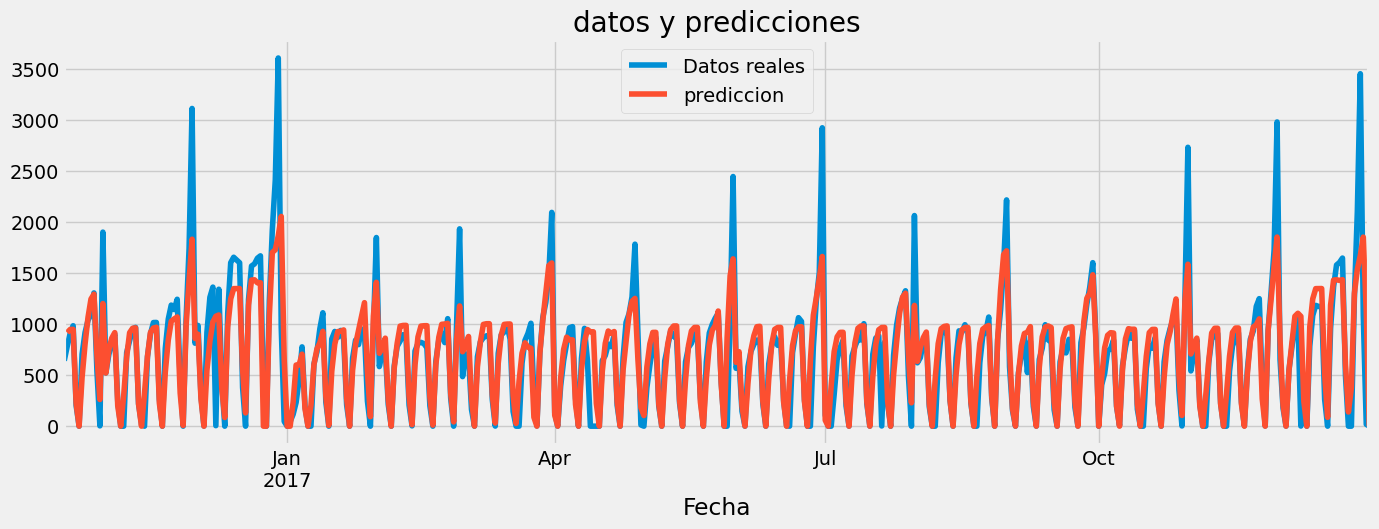

In [ ]:
#una vista mas cercana

ax = df[df.index>=Fecha_de_corte][['Unidades']].plot(figsize=(15, 5))
test['prediction'].plot(ax=ax, style='-')
plt.legend(['Datos reales', 'prediccion'])
ax.set_title('datos y predicciones')
plt.show()

Creamos un DataFrame que contiene las predicciones del modelo para el conjunto de prueba.

In [ ]:
PREDICCIONDES_TEST=test[['prediction']]
PREDICCIONDES_TEST

,prediction
Fecha,
2016-10-19,915.379944
2016-10-20,946.679565
2016-10-21,947.264465
2016-10-22,223.919510
2016-10-23,0.000000
...,...
2017-12-27,1534.931030
2017-12-28,1669.063110
2017-12-29,1850.483765


# Puntaje (RMSE)

Calculamos el RMSE entre las predicciones del modelo y las etiquetas reales en el conjunto de prueba, dando una métrica de evaluación del rendimiento del modelo ( Un valor de RMSE más bajo indica un mejor rendimiento predictivo del modelo) .

In [ ]:
scoreRMSE = np.sqrt(mean_squared_error(test['Unidades'], test['prediction']))
print(f'RMSE Score on Test set: {scoreRMSE:0.2f}')

RMSE Score on Test set: 277.60


Calculamos el MSE, una métrica comúnmente utilizada para evaluar la calidad de las predicciones de un modelo, un valor de MSE más bajo indica un mejor rendimiento del modelo.

In [ ]:
scoreMSE = mean_squared_error(test['Unidades'], test['prediction'])
print(f'MSE Score on Test set: {scoreMSE:0.2f}')

MSE Score on Test set: 77061.44


# Calculo del Error

Identificamos las fechas específicas en las que el modelo tiene un rendimiento deficiente, ya que ordena las fechas según el promedio de error. 

In [ ]:
test['error'] = np.abs(test[OBJETIVO] - test['prediction'])
test['date'] = test.index.date
top_error_dates = test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)
df_pred = pd.DataFrame(top_error_dates.reset_index(), columns=['date', 'error'])
df_pred


,date,error
0,2017-12-28,1779.936890
1,2016-12-29,1740.266846
2,2016-11-30,1279.391357
3,2017-06-30,1259.490356
4,2017-10-31,1144.439209
5,2017-11-30,1126.307007
6,2017-12-30,1105.704956
7,2016-12-30,1087.621582
8,2017-12-08,1074.045288
9,2016-12-08,1070.616577


Tabla 2, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Preciccion del año 2018

Preparamos los datos, definimos las variables a utilizar, y entrenamos el modelo de regresión XGBoost con el conjunto completo de datos, con el objetivo de predecir la variable 'Unidades' basándose en las características seleccionadas.

In [ ]:
df = crear_caracteristicas(df)

CARACTERISTICAS_Finales = ['dia_de_semana', 'mes', 'año', 'dia_del_mes','semana_del_año','dia_del_año', 'Trimestre']
OBJETIVO = 'Unidades'

X_all = df[CARACTERISTICAS_Finales]
Y_all = df['Unidades']

reg_final = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg_final.fit(X_all, Y_all,
        eval_set=[(X_all, Y_all)],
        verbose=100)

[0]	validation_0-rmse:947.91641
[100]	validation_0-rmse:451.54885
[200]	validation_0-rmse:311.46712


C:\Users\yefer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [19:24:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:271.20598
[400]	validation_0-rmse:253.48565
[500]	validation_0-rmse:242.59348
[600]	validation_0-rmse:234.53422
[700]	validation_0-rmse:226.62932


[800]	validation_0-rmse:221.61806
[900]	validation_0-rmse:216.81961
[999]	validation_0-rmse:212.94450


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

Miramos la fecha más reciente en los datos.

In [ ]:
#df.index.max()
max_date_df = pd.DataFrame({'Fecha Más Reciente': [df.index.max()]})
max_date_df

,Fecha Más Reciente
0,2017-12-31


Sacamos un conjunto de datos futuro, cubriendo el período desde '2012-01-01' hasta '2018-12-31'. 

In [ ]:
# Create future dataframe
future = pd.date_range('2012-01-01','2018-12-31', freq='1d')
future_df = pd.DataFrame(index=future)
future_df

""
2012-01-01
2012-01-02
2012-01-03
2012-01-04
2012-01-05
...
2018-12-27
2018-12-28
2018-12-29
2018-12-30


Agregamos características temporales a las fechas futuras, realizando predicciones utilizando el modelo entrenado para el año 2018 y visualizamos estas predicciones junto con los datos reales.

Figura 13. Gráfica predicciones junto con los datos reales.

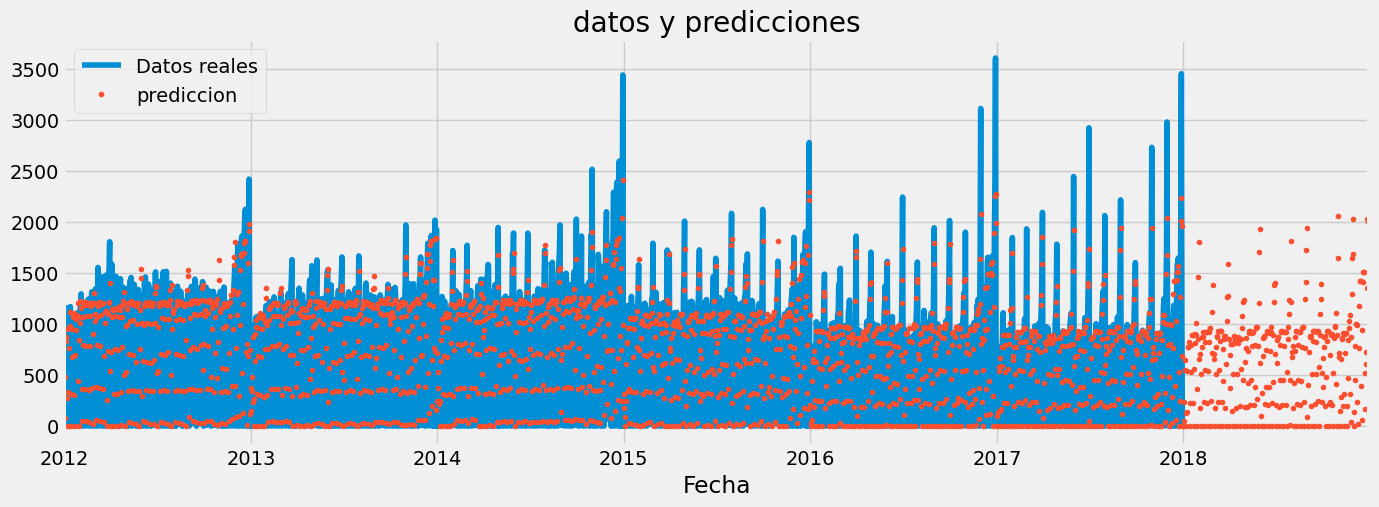

In [ ]:
future_df=crear_caracteristicas(future_df)
future_df

future_df['prediction2018'] = reg_final.predict(future_df[CARACTERISTICAS_Finales])
future_df['prediction2018']=future_df['prediction2018'].apply(lambda x: max(0, x))
ax = df[['Unidades']].plot(figsize=(15, 5))
future_df['prediction2018'].plot(ax=ax, style='.')
plt.legend(['Datos reales', 'prediccion'])
ax.set_title('datos y predicciones')
plt.show()


Filtramos el DataFrame original para mostrar una vista más cercana de los datos reales y las predicciones para el año 2018, centrándonos en las fechas posteriores a la fecha de corte. Esto nos permite una evaluación más detallada de cómo las predicciones del modelo coinciden con los datos reales en un período específico.

Figura 14. Gráfica vista más cercana de los datos reales y las predicciones para el año 2018

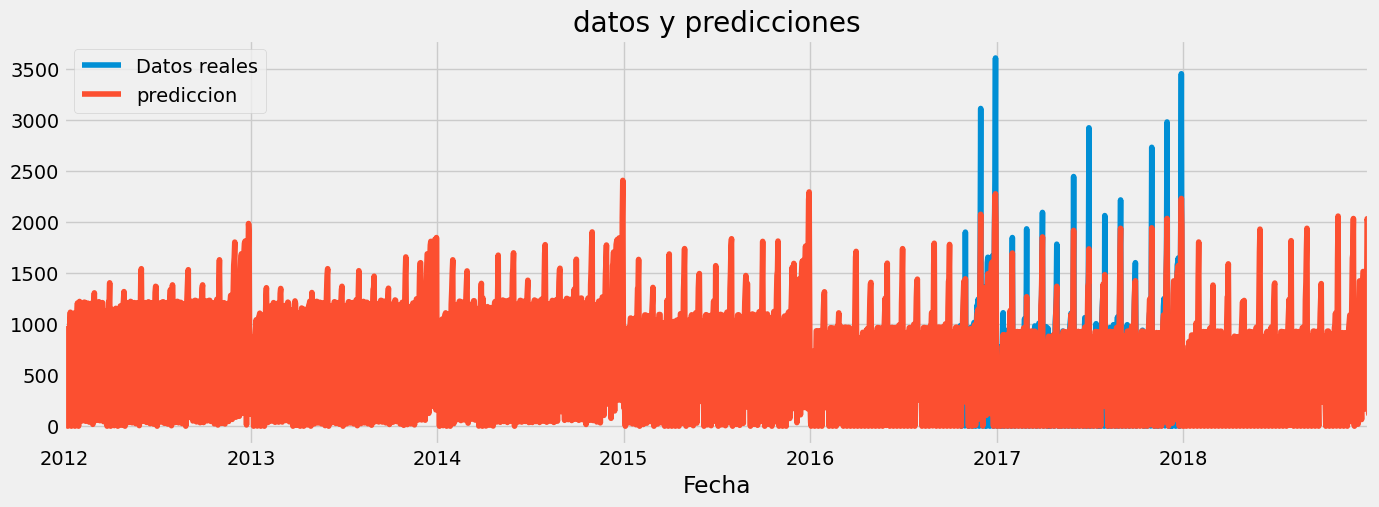

In [ ]:
#una vista mas cercana

ax = df[df.index>=Fecha_de_corte][['Unidades']].plot(figsize=(15, 5))
future_df['prediction2018'].plot(ax=ax, style='-')
plt.legend(['Datos reales', 'prediccion'])
ax.set_title('datos y predicciones')
plt.show()

Mostramos las predicciones realizadas para el año 2018 utilizando el modelo entrenado.

In [ ]:
#Todos los datos predichos para el 2018 en forma de tabla
Predictions=future_df[['prediction2018']]
Predictions

,prediction2018
2012-01-01,0.000000
2012-01-02,76.468140
2012-01-03,477.447144
2012-01-04,837.807861
2012-01-05,868.994324
...,...
2018-12-27,2030.580078
2018-12-28,2001.935791
2018-12-29,721.633301
2018-12-30,119.035103


Tabla 3, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Se deben entregar dos archivos planos con las siguientes predicciones del modelo:

1. Predicciones para los días comprendidos entre el 01/01/2012 y el 31/12/2016.
2. Predicciones para los días comprendidos entre el 01/01/2018 y el 30/06/2018.

1)

Seleccionamos y mostramos las predicciones realizadas para el período específico mencionado (2012-2016).

In [ ]:
Predictions[(Predictions.index>'2012-01-01') & (Predictions.index<'2016-12-31')]

,prediction2018
2012-01-02,76.468140
2012-01-03,477.447144
2012-01-04,837.807861
2012-01-05,868.994324
2012-01-06,952.395142
...,...
2016-12-26,1161.635254
2016-12-27,1892.369629
2016-12-28,2251.778564
2016-12-29,2274.273193


Tabla 4, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-viales

Creamos un archivo CSV que contiene las predicciones filtradas para el período anteriormente especificado.

In [ ]:
Predictions[(Predictions.index>'2012-01-01') & (Predictions.index<'2016-12-31')].to_csv('archivo_plano1.csv', index=False)

2)

Seleccionamos y mostramos las predicciones realizadas para el primer semestre del año 2018.

In [ ]:
Predictions[(Predictions.index>'2018-01-01') & (Predictions.index<'2018-06-30')]

,prediction2018
2018-01-02,54.729462
2018-01-03,234.898453
2018-01-04,551.715149
2018-01-05,644.217102
2018-01-06,129.022308
...,...
2018-06-25,435.520477
2018-06-26,896.177917
2018-06-27,1219.497192
2018-06-28,1383.518555


Tabla 5, Fuente propia con datos recuperados de: http://medata.gov.co/dataset/incidentes-vials

Creamos un archivo CSV que contiene las predicciones filtradas para el primer semestre del año 2018. 

In [ ]:
Predictions[(Predictions.index>'2018-01-01') & (Predictions.index<'2018-06-30')].to_csv('archivo_plano2.csv', index=False)

Una variación mayor al 10% entre el  R2  calculado para el primer semestre de 2017 y para el primer semestre de 2018 hará que estos dos ítems de la calificación sean iguales a cero.

En este caso utilizaremos el los semestres 2016-S1 y 2017-S1

Calculamos el coeficiente de determinación para evaluar qué tan bien las predicciones para el primer semestre de 2018 se comparan con las unidades reales para el mismo período en 2017 (Un R cuadrado más cercano a 1 indica un mejor ajuste del modelo a los datos reales).

In [ ]:
R2017_S1=r2_score(Predictions[(Predictions.index>'2017-01-01') & (Predictions.index<'2017-06-30')][['prediction2018']],
                  df[(df.index>'2017-01-01') & (df.index<'2017-06-30')][['Unidades']])
R2017_S1_1=R2017_S1
R2017_S1 = pd.DataFrame({'R2017_S1': [R2017_S1]})
R2017_S1

,R2017_S1
0,0.811035


Calculamos el coeficiente de determinación para evaluar la concordancia entre las predicciones realizadas para el segundo semestre de 2018 y las unidades reales del primer semestre de 2016.

In [ ]:
R2016_S1=r2_score(Predictions[(Predictions.index>'2017-06-30') & (Predictions.index<'2017-12-31')][['prediction2018']],
                  df[(df.index>'2017-06-30') & (df.index<'2017-12-31')][['Unidades']])
R2016_S1_1=R2016_S1
R2016_S1 = pd.DataFrame({'R2016_S1': [R2016_S1]})
R2016_S1

,R2016_S1
0,0.799232


Calculamos la variación porcentual entre los coeficientes de determinación de dos periodos diferentes (segundo semestre de 2017 y primer semestre de 2016).

In [ ]:
Variacion_porcentaje=((R2017_S1_1/R2016_S1_1)-1)*100
Variacion_porcentaje = pd.DataFrame({'Variacion_porcentaje': [Variacion_porcentaje]})
Variacion_porcentaje
#meta cumplida

,Variacion_porcentaje
0,1.476689


## Anexos

Reporte técnico:  https://deepnote.com/@dioselin-esteban-brito-penaloza/Fundamentos-de-Analitica-9bf70f57-8204-4e96-942e-40df61245296

Repositorio: https://github.com/Yeferson05/Analitica-Trabajo4

## Conclusiones

## Referencias

https://docs.google.com/spreadsheets/d/1OiQ3hDnWxE9j9OYh-Otji0hPyhamJBiNU338HQr0kfM/edit#gid=861042957

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9bf70f57-8204-4e96-942e-40df61245296' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>